In [1]:
import os, re
from bs4 import BeautifulSoup
import json

def find_archive(name):
    read_data = []
    for file in os.listdir(name):
        if file[-4:] == 'html':
            print(file)
            with open('Keep/' + file, 'r') as f:
                read_data.append(f.read())
            f.closed
    return read_data
#find_archive('Keep')

In [25]:
def add_to_log(source, id, date, body):
    log = ({"source":source, "user_id":str(id), "date":date, 
            "body":str(body)})
    return log
    #write_log(file='Log_raw/Log_raw.txt', log=log)

In [11]:
import time
import datetime
DATES = {'января':1, 'февраля':2,'марта':3,'апреля':4,'мая':5,'июня':6,
 'июля':7,'августа':8,'сентября':9,'октября':10,'ноября':11,'декабря':12}


#def find_time_at_keep(data):
#    soup = BeautifulSoup(data, 'html.parser')
    
#    date = re.findall(string=str(soup.div), pattern='\d.*\d+:\d+:\d+')
#    date = date[0].split()
#    date = (str(date[0]) + '/' + str(DATES[date[1]]) +  '/' + str(date[2]) +
#             '/' + str(date[4])
#           )
#    dtime = time.mktime(datetime.datetime.strptime(date, "%d/%m/%Y/%H:%M:%S").timetuple())
#    return dtime

def keep_date_normalize(lines_with_date):
    date = re.findall(string=str(lines_with_date), pattern='\d.*\d+:\d+:\d+')
    if len(date) == 0:
        return None
    date = date[0].split()
    date = (str(date[0]) + '/' + str(DATES[date[1]]) +  '/' + str(date[2]) +
             '/' + str(date[4])
           )
    dtime = time.mktime(datetime.datetime.strptime(date, "%d/%m/%Y/%H:%M:%S").timetuple())
    return dtime
    



#get back to readable
#datetime.datetime.fromtimestamp(dtime).strftime('%Y-%m-%d %H:%M:%S')
#find_time_at_keep(read_data[-1])

In [8]:
def log_from_keep(data_html):
    log = []
    for data in data_html:
        soup = BeautifulSoup(data, 'html.parser')
        date = keep_date_normalize(soup.title)
        if not date:
            date = keep_date_normalize(soup.div)
        body = soup.find_all(attrs={"class": "content"})
        body = body[0]
        log.append(add_to_log(source='Gkeep_arc', id='my', date=date, 
                              body=body.contents)
                  )
    return log
print(str(log_from_keep(read_data)))

[{'user_id': 'my', 'body': "['go to sleep', <br/>]", 'source': 'Gkeep_arc', 'date': '1526640228.0'}, {'user_id': 'my', 'body': '[]', 'source': 'Gkeep_arc', 'date': '1526569202.0'}, {'user_id': 'my', 'body': '[\'имени М.В. Ломоносова\', <br/>, \'.столовые диетического.nni atwi. Ml. ฯ\', <br/>, \'КАССОВЫЙ ЧЕК\', <br/>, \'РИХОД\', <br/>, \'1) Curl Phi6НЫЙ (семга)\', <br/>, \'1.000本45.00 45.00\', <br/>, \'4.09\', <br/>, \'HAC 10/110\', <br/>, \'2) Каша пшеничная с ГРибами\', <br/>, \'1.000 + 45.00 45.00\', <br/>, \', 09\', <br/>, \'3) Треска с пониаоРом запеченная (ФИ\', <br/>, \'1.000 * 85.00 85.00\', <br/>, \'7.73\', <br/>, \'04\', <br/>, \'НАС 10/110\', <br/>, \'H且C\', <br/>, \'10// 1 10\', <br/>, \'тога,\', <br/>, \'三175.00\', <br/>, \'15.91\', <br/>, \'CuMma HAC 10/110\', <br/>, \'ЭЛЕКТРОННЫМИ\', <br/>, \'CHO:\', <br/>, \'#175.00\', <br/>, \'#175 .00\', <br/>, \'OCH\', <br/>, \'ользоватепь:\', <br/>, \'ELEPAílbi IOE ГОСУ РСТВЕННОЕ ЬЮАХЕТНОЕ\', <br/>, "БРАЗОВАНИЯ \'МОСКОВСКИЙ Í 0C91ї А

In [12]:
def get_all_message(file='Log_raw/Gkeep_arc.txt'):
    with open(file, 'r') as dt:
        all_mes = dt.read()
        dt.close()
        return all_mes
# text = get_last_message()

In [23]:
def get_last_date(file='Log_raw/Gkeep_arc.txt'):
    try:
        last_line = (get_all_message(file=file).split('\n')[-2])
        return json.loads(last_line)['date']
    except IndexError:
        return 0

In [20]:

def write_log_new(file='Log_raw/Gkeep_arc.txt', logs=None, new_t=0):
    with open(file, 'a') as dt:
        for log in logs:
            if log['date'] > new_t:
                dt.write(json.dumps(log, sort_keys=True) + '\n')
        dt.close()


# Final function Keep

In [28]:
log = log_from_keep(find_archive('Keep'))
write_log_new(file='Log_raw/Gkeep_arc.txt', logs=log, new_t=get_last_date('Log_raw/Gkeep_arc.txt'))

2018-05-18T13_43_48.204Z.html
2018-05-17T18_00_02.859Z.html
2018-05-17T18_18_26.208Z.html
2018-05-17T18_00_04.193Z.html
2018-05-17T17_12_35.293Z.html
2018-05-18T05_28_36.491Z.html
2018-05-17T18_17_37.327Z.html
Project.html


In [89]:
read_data[0]
for data in read_data:
    soup = BeautifulSoup(data, 'html.parser')
    date = keep_date_normalize(soup.title)
    if not date:
        date = keep_date_normalize(soup.div)
    body = soup.find_all(attrs={"class": "content"})
    body = body[0]
    print(date)
    print(body.contents)
    
    #print(soup.title)
    #print(soup.find_all(attrs={"class":"meta-icons"}))
    #print(soup.find_all(attrs={"class": "content"}))
    print()

1526640228.0
['go to sleep', <br/>]

1526569202.0
[]

1526570306.0
['имени М.В. Ломоносова', <br/>, '.столовые диетического.nni atwi. Ml. ฯ', <br/>, 'КАССОВЫЙ ЧЕК', <br/>, 'РИХОД', <br/>, '1) Curl Phi6НЫЙ (семга)', <br/>, '1.000本45.00 45.00', <br/>, '4.09', <br/>, 'HAC 10/110', <br/>, '2) Каша пшеничная с ГРибами', <br/>, '1.000 + 45.00 45.00', <br/>, ', 09', <br/>, '3) Треска с пониаоРом запеченная (ФИ', <br/>, '1.000 * 85.00 85.00', <br/>, '7.73', <br/>, '04', <br/>, 'НАС 10/110', <br/>, 'H且C', <br/>, '10// 1 10', <br/>, 'тога,', <br/>, '三175.00', <br/>, '15.91', <br/>, 'CuMma HAC 10/110', <br/>, 'ЭЛЕКТРОННЫМИ', <br/>, 'CHO:', <br/>, '#175.00', <br/>, '#175 .00', <br/>, 'OCH', <br/>, 'ользоватепь:', <br/>, 'ELEPAílbi IOE ГОСУ РСТВЕННОЕ ЬЮАХЕТНОЕ', <br/>, "БРАЗОВАНИЯ 'МОСКОВСКИЙ Í 0C91ї АРСТВЕНН"]

1526569204.0
[<br/>, <br/>, 'I just finished my supper without meat']

1526566355.0
['okay thanks login to Google Keep']

1526610516.0
['первая идея:', <br/>, 'научить людей выигрывать и ма

In [47]:
soup = BeautifulSoup(read_data[-1], 'html.parser')
date = re.findall(string=str(soup.div), pattern='\d.*\d+:\d+:\d+')
date = date[0].split()
date = str(date[0]) + '/' + str(dates[date[1]]) +  '/' + str(date[2]) + '/' + str(date[4])


In [48]:
date

'17/5/2018/17:07:06'

In [63]:
import time
import datetime
s = date#"01/12/2011"
dtime = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y/%H:%M:%S").timetuple())

In [85]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(read_data[-1], 'html.parser')

#print(soup.prettify())

In [53]:
soup.title

<title>18 мая 2018 г., 13:43:48</title>

In [87]:
soup.div#find_all('div' 'class="content"')

<div class="note"><div class="heading"><div class="meta-icons">
</div>
17 мая 2018 г., 17:07:06</div>
<div class="title">Project</div>
<div class="content">First of all we need logging - formalize my life or state of environment to optimize late  </div>
</div>

In [79]:
for i in soup.div.children:
    print (i)

re.compile('^[a-zA-Z0-9][-.a-zA-Z0-9:_]*$')
re.compile('^[a-zA-Z0-9][-.a-zA-Z0-9:_]*$')
re.compile('^[a-zA-Z0-9][-.a-zA-Z0-9:_]*$')
re.compile('^[a-zA-Z0-9][-.a-zA-Z0-9:_]*$')
re.compile('^[a-zA-Z0-9][-.a-zA-Z0-9:_]*$')


# Maps

In [2]:
import json

file = "Takeout/История местоположений/История местоположений.json"
data = []
with open(file, 'r') as f:
    data = json.loads(f.read())
    f.close()


## Create basketball SPocket

In [2]:
#import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
#sys.path.append('/home/denis/Program/NewLive/lib/')
#import location_history_json_converter as loch
#loch

#from testcase import TestCase
#from testutils import RunTests
#from mock import Mock, sentinel, patch
#def take_

In [3]:
import bisect
import time
import datetime

MILS_TO_S = 1e3

def precompute_data(data, need_sort=True):
    if need_sort:
        data.sort(key=lambda x: x['timestampMs'])
    if len(data) > 1 and data[0]['timestampMs'] > data[1]['timestampMs']:
        data = list(reversed(data))
    keys = [int(x['timestampMs']) for x in data]
    return data, keys

def take_period(data, keys, start="2000-01-21 16:20:20", end="2013-09-21 16:20:20"): 
    #data sorted and reversed location old->new, with keys = [timestampMs, ]
    start = time_str_to_int(start) 
    end = time_str_to_int(end)
    i_start, i_end = bisect.bisect_left(keys, start), bisect.bisect_right(keys, end)
    print(i_start, i_end, end)
    return data[i_start:i_end]
    
def time_str_to_int(t):
    if ":" in t:
        d = datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S").timestamp()
    else:
        d = datetime.datetime.strptime(t, "%Y-%m-%d").timestamp()
    return d * MILS_TO_S
        
def time_int_to_str(t):
    return datetime.datetime.fromtimestamp(t / MILS_TO_S)

In [4]:
data, keys = precompute_data(data['locations'])

In [5]:
bskt_data = take_period(data, keys, end="2013-10-01")

0 90196 1380571200000.0


## Kmeans classification of places

Problem that we have places where I usualy be (center of classes) and traectory beetwen this place, but Kmeans look at way between classes as class or give middle point between multiple classes and trajectorys. As example: (Kooperativnaya Ulitsa, 66, Yamkino, Moskovskaya oblast', Russia, 142430)   

In [77]:
array = np.zeros([90196, 2])
array.shape
for i, point in enumerate(bskt_data):
    array[i, 0] = point['latitudeE7'] / 1e7
    array[i, 1] = point['longitudeE7'] / 1e7

In [79]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(array)

In [101]:
my_places = {}
for places in kmeans.cluster_centers_:
    my_places[get_place(*places)] = places

### Get street by google api

In [88]:
import requests

with open("/home/denis/sensitive_data.py", "r") as f:
    GCkey = json.loads(f.read())['GEOCODINGAPI']
    f.close()
lat = 55.57684638
lon = 38.2220405


In [100]:
def get_place(lat, lon):
    req = "https://maps.googleapis.com/maps/api/geocode/json?latlng={},{}&key={}".format(lat, lon, GCkey)
    ans = json.loads(requests.get(req).text)
    return (ans['results'][0]['formatted_address'])

In [102]:
my_places

{'Cvite Fiskovića 3, 21000, Split, Croatia': array([ 43.51176399,  16.46535337]),
 "Kooperativnaya Ulitsa, 66, Yamkino, Moskovskaya oblast', Russia, 142430": array([ 55.93187337,  38.41569192]),
 'Lebedyanskaya Ulitsa, 12 корпус 2, Moskva, Russia, 115372': array([ 55.58522362,  37.67089252]),
 'Sõpruse puiestee 263a, 13414 Tallinn, Estonia': array([ 59.39727537,  24.67315249]),
 "Ulitsa Konstantinova, 20, Malakhovka, Moskovskaya oblast', Russia, 140030": array([ 55.65049947,  38.00156269]),
 'Ulitsa Kosygina, 61, Moskva, Russia, 119285': array([ 55.71829815,  37.52973881]),
 "Ulitsa Mira, 4, Ramenskoye, Moskovskaya oblast', Russia, 140105": array([ 55.57684638,  38.2220405 ]),
 "Ulitsa Stroiteley, 11/1, Magnitogorsk, Chelyabinskaya oblast', Russia, 455001": array([ 53.43273356,  58.98941031]),
 "Unnamed Road, Moskovskaya oblast', Russia": array([ 55.75685496,  38.62158178]),
 'Volgogradskiy Prospekt, 7, Moskva, Russia, 109316': array([ 55.73142679,  37.67404605])}

## Use hash_table for fast complete.  

In [36]:
k

defaultdict(<function __main__.<lambda>>,
            {'IN_VEHICLE': 1664,
             'Noact': 50277,
             'ON_BICYCLE': 40,
             'ON_FOOT': 2456,
             'STILL': 35759})

In [10]:
import math
import numpy as np
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + \
    math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * \
    math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c # Distance in km
    return d


def deg2rad(deg):
    return deg * (math.pi/180)

In [11]:
def grad_speed(a, b):
    S = getDistanceFromLatLonInKm(a['latitudeE7'] / 1e7, a['longitudeE7'] / 1e7,
                                  b['latitudeE7'] / 1e7, b['longitudeE7'] / 1e7)
    t = (int(b['timestampMs']) - int(a['timestampMs']))/1000/3600
    return S, t, S/t

In [33]:
day = take_period(*precompute_data(bskt_data), start="2013-04-02 4:00:00", end="2013-04-03 4:00:00") 
    

def compute_data(data):
    for i in range(len(data[:-1])):
        distant, t, speed = grad_speed(data[i], data[i + 1])
        data[i]['grad_speed'] = speed
        if i + 2 >= len(data):
            data[i]['move_forward'] = 0
            data[i + 1]['move_forward'] = 0
        else:
             data[i]['move_forward'] = grad_speed(data[i], data[i + 2])[0] - distant
        data[i]['duration_s'] = (int(data[i + 1]['timestampMs']) - int(data[i]['timestampMs']))/1e3
    data[i + 1]['grad_speed'] = data[i]['grad_speed']
    data[i + 1]['duration_s'] = 20 #last duration
    return data
        
cd = compute_data(day)

327 834 1364947200000.0


Check our data

In [34]:
from collections import defaultdict
k = defaultdict(lambda: 0)
#k.setdefault()
ex = cd[:]

action = 'stable'
for p in ex:
    #print(p)
    if 'activity' in p:
        if len(p['activity']) > 1:
            print(p['activity'])
        k[p['activity'][0]['activity'][0]['type']] += 1
    else:
        k['Noact'] += 1
    if p['move_forward'] < 0:
        k['returns_point'] += 1
    if p['grad_speed'] < 2:
        k['stable_'] += p['duration_s']
    if 2 <= p['grad_speed'] < 17:
        k['walk_run_b'] += p['duration_s']
    if p['grad_speed'] >= 17:
        k['transport'] += p['duration_s']
    k['ALL_TIME'] += p['duration_s']
k['ALL_POINTS'] = len(ex)
    
k

defaultdict(<function __main__.<lambda>>,
            {'ALL_POINTS': 507,
             'ALL_TIME': 62360.23599999998,
             'IN_VEHICLE': 17,
             'Noact': 247,
             'ON_BICYCLE': 1,
             'ON_FOOT': 11,
             'STILL': 231,
             'returns_point': 29,
             'stable_': 49375.863999999994,
             'transport': 7371.648999999999,
             'walk_run_b': 5612.723})

In [ ]:
class Day:
    def __init__(data):
        self.last_point = data[0]
        self.data = data
        self.compress_data = []
    def add_point(action, point):
        #Travel = namedtuple('Travel', ['start_time', 'start_dst', 'final_dst', 'duration']) 
        #action = defaultdict(lambda: 0)
        if 'activity' in point:
            if len(point['activity']) > 1:
                print("Strange Point!", point['activity'])
            action[point['activity'][0]['activity'][0]['type']] += point['duration_s']
        #else:
        #    action['Noact'] += point['duration_s']
        if point['move_forward'] < 0:
            k['returns_point'] += 1
        if p['grad_speed'] < 2:
            k['stable_'] += p['duration_s']
        if 2 <= p['grad_speed'] < 17:
            k['walk_run_b'] += p['duration_s']
        if p['grad_speed'] >= 17:
            k['transport'] += p['duration_s']
        k['ALL_TIME'] += p['duration_s']
    k['ALL_POINTS'] = len(ex)

In [40]:
d = [1,2,3]
a = d.pop()
a = 20
d.append(a)
d

[1, 2, 20]

In [36]:
7371 / 3600, time_int_to_str(int(ex[0]['timestampMs'])), time_int_to_str(int(ex[-1]['timestampMs']))


(2.0475,
 datetime.datetime(2013, 4, 2, 6, 21, 3, 542000),
 datetime.datetime(2013, 4, 2, 23, 40, 3, 778000))

In [118]:
from collections import namedtuple
Travel = namedtuple('Travel', ['start_time', 'start_dst', 'final_dst', 'duration'])  
Stabel = namedtuple('Stabel', ['start_time', 'place', 'duration'])
Walk = namedtuple('Walk', ['start_time', 'start_dst', 'final_dst', 'duration'])

#travels = {}
#stabels = [defaultdict(lambda: Stabel((cd[0]['latitudeE7'], cd[0]['longitudeE7']),cd[0]['time_s_to_next_point']))]

#last_place = cd[0]
action = 'st' #st, tr, w
i = 0

for i in range(len(cd)):
    if action = 'st':
        #print(cd[i])
        
        if cd[i]['grad_speed'] < 2:
            stabels[cd[i][]
            pass


In [122]:
stabels[0]['s']

Stabel(place=(557719613, 376558166), duration=69.47)

In [13]:
cd[0]

{'accuracy': 777,
 'duration_s': 69.47,
 'grad_speed': 20.014166175770903,
 'latitudeE7': 557719613,
 'longitudeE7': 376558166,
 'move_forward': 4.604117031244828,
 'timestampMs': '1364810473086'}

In [53]:
ex[0]#['latitudeE7']  ex[0]['grad'] = 
#time, accuracy, lat, lon, speed, active_type
df = np.zeros([6, len(data)])
    for point in data:
        df[0] = point['timestampMs']
        df[1] = point['timestampMs']
        df[2] = point['timestampMs']
        df[3] = point['timestampMs']
        df[4] = point['timestampMs']
        df[5] = point['timestampMs']

{'accuracy': 777,
 'grad': 390.15730576004808,
 'latitudeE7': 557719613,
 'longitudeE7': 376558166,
 'timestampMs': '1364810473086'}

In [114]:
cd[1]

{'accuracy': 616,
 'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
   'timestampMs': '1364810521119'}],
 'grad_speed': 234.16951537063795,
 'latitudeE7': 557748071,
 'longitudeE7': 376522762,
 'time_s_to_next_point': 71.02,
 'timestampMs': '1364810542556'}

In [72]:


for i in range(100):
    print(grad_speed(ex[i], ex[i+1]))
    print(time_int_to_str(int(ex[i]['timestampMs'])))
    if 'activity' in ex[i]:
        print(time_int_to_str(int(ex[i]['activity'][0]['timestampMs'])))
        act = ex[i]['activity'][0]['activity'][0]
        print(act)

(0.3862178122863346, 0.019297222222222223, 20.014166175770903)
2013-04-01 14:01:13.086000
(4.6196441615618635, 0.019727777777777778, 234.16951537063795)
2013-04-01 14:02:22.556000
2013-04-01 14:02:01.119000
{'confidence': 100, 'type': 'STILL'}
(4.628782854101367, 0.03170055555555556, 146.01582757719737)
2013-04-01 14:03:33.576000
2013-04-01 14:03:40.110000
{'confidence': 100, 'type': 'ON_FOOT'}
(0.0, 0.05003305555555555, 0.0)
2013-04-01 14:05:27.698000
2013-04-01 14:06:40.590000
{'confidence': 100, 'type': 'ON_FOOT'}
(0.3681790371945091, 0.01744333333333333, 21.107149084340293)
2013-04-01 14:08:27.817000
(0.08698882139648108, 0.03283972222222222, 2.6488902923063353)
2013-04-01 14:09:30.613000
2013-04-01 14:09:40.942000
{'confidence': 100, 'type': 'ON_FOOT'}
(0.08698882139648108, 0.01761527777777778, 4.938259986238775)
2013-04-01 14:11:28.836000
(0.0, 0.0321525, 0.0)
2013-04-01 14:12:32.251000
2013-04-01 14:12:33.436000
{'confidence': 100, 'type': 'ON_FOOT'}
(0.009767918113896821, 0.016

In [52]:
ex[0]['grad'] = np.var([ex[0]['latitudeE7']/1e4-ex[1]['latitudeE7']/1e4, ex[0]['latitudeE7']/1e4-ex[2]['latitudeE7']/1e4])  

In [61]:
#getDistanceFromLatLonInKm(ex[0]['latitudeE7']-ex[1]['latitudeE7'])
557748071/1e7

55.7748071

In [69]:
bskt_data[:10]

[{'accuracy': 777,
  'grad': 390.15730576004808,
  'latitudeE7': 557719613,
  'longitudeE7': 376558166,
  'timestampMs': '1364810473086'},
 {'accuracy': 616,
  'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
    'timestampMs': '1364810521119'}],
  'latitudeE7': 557748071,
  'longitudeE7': 376522762,
  'timestampMs': '1364810542556'},
 {'accuracy': 500,
  'activity': [{'activity': [{'confidence': 100, 'type': 'ON_FOOT'}],
    'timestampMs': '1364810620110'}],
  'latitudeE7': 558143119,
  'longitudeE7': 376293991,
  'timestampMs': '1364810613576'},
 {'accuracy': 1061,
  'activity': [{'activity': [{'confidence': 100, 'type': 'ON_FOOT'}],
    'timestampMs': '1364810800590'}],
  'latitudeE7': 557746708,
  'longitudeE7': 376520012,
  'timestampMs': '1364810727698'},
 {'accuracy': 1061,
  'latitudeE7': 557746708,
  'longitudeE7': 376520012,
  'timestampMs': '1364810907817'},
 {'accuracy': 678,
  'activity': [{'activity': [{'confidence': 100, 'type': 'ON_FOOT'}],
    'timesta

In [ ]:
#from collections import defaultdict
loc_dict = {} #defaultdict()
#loc_dict.set
for point in bskt_data:
    

In [16]:
def find_nearest(inp_data):
    data = inp_data.copy()
    data.sort(key=lambda x: x['latitudeE7'])
    lat = [int(x['latitudeE7']) for x in data]
    var = []
    i = 100
    while i < len(lat[:10000]):
        var.append(np.var(lat[i - 100 : i]))
        i += 1
    return var

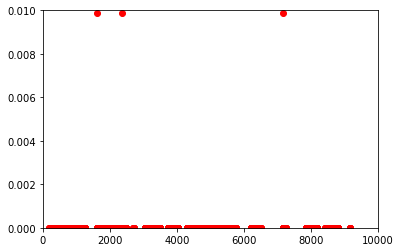

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
#xv = find_nearest(bskt_data)
plt.plot(range(len(xv)),xv, "ro")
plt.axis([0, 10000, 0, 0.01])
plt.show()

In [ ]:
def near_val(cur_loc_val):
    return cur_loc_val - 0.001, cur_loc_val + 0.001

In [109]:
#for i, point in enumerate(bskt_data[1:-1]):
    #if i near i - 1 
    #old place += time(i:i) if < 1000?
#    else
#    find_nearest place to point getDistanceFromLatLonInKm < 1 / 0.2

In [106]:
getDistanceFromLatLonInKm(55.71829815,  37.52973881, 55.58522362,  37.67089252)

17.24476860382001

In [89]:
ans = requests.get(req)

"Ulitsa Mira, 4, Ramenskoye, Moskovskaya oblast', Russia, 140105"

In [71]:
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
#kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_

[0 0 0 1 1 1]


array([[ 1.,  2.],
       [ 4.,  2.]])

In [57]:
bskt_data[-2:]

[{'accuracy': 1719,
  'latitudeE7': 435097387,
  'longitudeE7': 164625600,
  'timestampMs': '1375033793981'},
 {'accuracy': 30,
  'latitudeE7': 435122586,
  'longitudeE7': 164665660,
  'timestampMs': '1375033906499'}]

In [58]:
1375033793981 - 1375033906499

-112518

In [54]:
for i in range(1, 30, 1):    
    print(datetime.datetime.fromtimestamp(int(bskt_data[- i]['timestampMs']) / 1e3))

2013-07-28 21:51:46.499000
2013-07-28 21:49:53.981000
2013-07-28 21:47:56.559000
2013-07-28 21:46:56.514000
2013-07-28 21:44:56.357000
2013-07-28 21:43:56.314000
2013-07-28 21:41:56.119000
2013-07-28 21:40:55.642000
2013-07-28 21:37:55.677000
2013-07-28 21:36:55.577000
2013-07-28 21:35:55.492000
2013-07-28 21:34:55.533000
2013-07-28 21:32:55.579000
2013-07-28 21:31:55.298000
2013-07-28 21:30:55.279000
2013-07-28 21:29:55.250000
2013-07-28 21:28:52.077000
2013-07-28 21:27:06.254000
2013-07-28 21:25:54.730000
2013-07-28 21:23:54.639000
2013-07-28 21:22:54.500000
2013-07-28 21:20:54.559000
2013-07-28 21:18:54.428000
2013-07-28 21:17:54.419000
2013-07-28 21:16:54.393000
2013-07-28 21:14:54.414000
2013-07-28 21:13:53.529000
2013-07-28 21:10:53.537000
2013-07-28 21:08:53.555000


In [62]:
p = [1,4,5,6,45,46,78,98]
#p = list(reversed(p))
import bisect

bisect.bisect_left(p, 0), bisect.bisect_right(p,8) 

(0, 4)

In [26]:
p


[1, 4, 5, 6, 45, 46, 78, 98]

In [ ]:
{'locations': [{'accuracy': 24,
   'latitudeE7': 558488193,
   'longitudeE7': 374864498,
   'timestampMs': '1526652148901'},
  {'accuracy': 24,
   'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
     'timestampMs': '1526651974716'}],
   'latitudeE7': 558488193,
   'longitudeE7': 374864498,
   'timestampMs': '1526652028829'},
              ]}

In [42]:
1526652148901 > 1526651974716

True

In [52]:
s = 1526651974716 #946684863900#"01/12/2011"
#dtime = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y/%H:%M:%S").timetuple())

In [62]:
for i in range(0, 7, 1):
    print(datetime.datetime.fromtimestamp(int(data['locations'][i*100000]['timestampMs']) / 1e3))


2018-05-18 17:02:28.901000
2018-02-01 04:21:55
2017-07-11 22:19:49.246000
2016-06-20 18:20:03.387000
2015-08-31 22:53:33.957000
2015-03-30 14:51:44.686000
2014-10-15 12:33:25.779000


In [64]:
data['locations'][:100]

[{'accuracy': 24,
  'latitudeE7': 558488193,
  'longitudeE7': 374864498,
  'timestampMs': '1526652148901'},
 {'accuracy': 24,
  'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
    'timestampMs': '1526651974716'}],
  'latitudeE7': 558488193,
  'longitudeE7': 374864498,
  'timestampMs': '1526652028829'},
 {'accuracy': 23,
  'latitudeE7': 558488246,
  'longitudeE7': 374865029,
  'timestampMs': '1526651907566'},
 {'accuracy': 23,
  'latitudeE7': 558488246,
  'longitudeE7': 374865029,
  'timestampMs': '1526651780351'},
 {'accuracy': 23,
  'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
    'timestampMs': '1526651723819'}],
  'latitudeE7': 558488246,
  'longitudeE7': 374865029,
  'timestampMs': '1526651724166'},
 {'accuracy': 21,
  'activity': [{'activity': [{'confidence': 100, 'type': 'STILL'}],
    'timestampMs': '1526651603382'},
   {'activity': [{'confidence': 100, 'type': 'STILL'}],
    'timestampMs': '1526651663586'}],
  'latitudeE7': 558488130,
  'l

In [63]:
data['locations'][-100:]

[{'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364819347394'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364819227352'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364819107315'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364819047252'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364818987221'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364818927191'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364818807199'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364818747155'},
 {'accuracy': 1172,
  'latitudeE7': 556424386,
  'longitudeE7': 380118072,
  'timestampMs': '1364818686959'},
 {'accurac

In [67]:
datetime.datetime.time(s)

TypeError: descriptor 'time' requires a 'datetime.datetime' object but received a 'int'

In [37]:
len(data['locations'])

779194

In [40]:
data['locations'][1].keys()

dict_keys(['timestampMs', 'accuracy', 'activity', 'latitudeE7', 'longitudeE7'])

# Google fit